## Assignment 2 - Feature Engineering and Model Tuning

### Data Description:
The actual concrete compressive strength (MPa) for a given mixture under a specific age
(days) was determined from laboratory. Data is in raw form (not scaled). The data has 8
quantitative input variables, and 1 quantitative output variable, and 1030 instances
(observations).

### Context:
Concrete is the most important material in civil engineering. The concrete compressive
strength is a highly nonlinear function of age and ingredients. These ingredients include
cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine
aggregate.<br>
<h5>Attribute Information:</h5>
<b>cement:</b> measured in kg in a m3 mixture<br>
<b>Fly ash Cement:</b> measured in kg in a m3 mixture<br>
<b>Blast:</b> measuredmeasured in kg in a m3 mixture<br>
<b>Water:</b> measured in kg in a m3 mixt<br>
<b>Superplasticizer:</b> measured in kg in a m3 mixture<br>
<b>Coarse Aggregate:</b> measured in kg in a m3 mixture<br>
<b>Fine Aggregate:</b> measured in kg in a m3 mixture<br>
<b>Age:</b> day (1~365)<br>
<b>Concrete:</b> compressive strength measured in MPa<br>

### Objective:
Modeling of strength of high performance concrete using Machine Learning

### Steps and tasks:

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import ols

In [2]:
# reading data from csv file
dataframe = pd.read_csv("concrete.csv")
dataframe.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


#### 1. Deliverable -1 (Exploratory data quality report)
<b>a. Univariate analysis</b>

In [3]:
def numerical_attribute_info(dataset, column='cement'):
    print("\033[1m"+"Description about '{}' attribute".format(column)+"\033[0m\n")
    print("Data Type: {}".format(dataset[column].dtype))
    # message about missing values
    total_missing_values = dataframe[column].isnull().sum()
    print("Missing values: {}\n".format(total_missing_values))
    
    # range of values observed
    minimum, maximum = dataset[column].min(), dataset[column].max()
    range_value = maximum - minimum 
    print("Minimum: {}\nMaximum: {}\nRange: {}\n".format(minimum, maximum, range_value))
    
    # central values
    average = dataset[column].mean()
    median = dataset[column].median()
    print("Mean: {}\nMedian(2nd Quartile): {}\n".format(average, median))
    
    # standard deviation and quartiles
    sd = dataset[column].std()
    quart1, quart3 = dataset[column].quantile(q=0.25), dataset[column].quantile(q=0.75)
    iqr = quart3 - quart1
    print("Standard Deviation: {}\n1st Quartile: {}\n"
          "3rd Quartile: {}\nInterquartile Range: {}\n".format(sd,quart1,quart3,iqr))
    
    # analysis of body of distribution
    skewness = dataset[column].skew()
    kurtosis = dataframe[column].kurt()
    print("Skewness: {}\nKurtosis: {}\n".format(skewness, kurtosis))
    
    # message about skewness
    if skewness < 0:
        print("Since skewness is negative. So, distribution is left tailed or negative skewed.") 
    elif skewness > 0:
        print("Since skewness is positive. So, distribution is right tailed or positive skewed.")
    else:
        print("Since skewness is zero. So, distribution is symmetrical.")
        
    # message about kurtosis
    excess_kurtosis = kurtosis - 3
    if excess_kurtosis < 0:
        print("Since excess kurtosis is negative."
              "So, distribution is Platykurtic (flat tails) and it indicates distribution may contain small outliers.")
    elif excess_kurtosis > 0:
        print("Since excess kurtosis is positive."
              "So, distribution is Leptokurtic (heavy tails) and it indicates distribution contain large outliers.")
    else:
        print("Since excess kurtosis is zero."
              "So, distribution is Mesokurtic (Normal distribution).")
    
    # plot distribution
    plt.figure()
    sns.histplot(dataframe[column], kde=True, stat="density")
    plt.title("Distribution of {} attribute.".format(column))
    plt.show()

Univariate Analysis of independent attributes:

Description about 'cement' attribute

Data Type: float64
Missing values: 0

Minimum: 102.0
Maximum: 540.0
Range: 438.0

Mean: 281.16786407766995
Median(2nd Quartile): 272.9

Standard Deviation: 104.50636449481532
1st Quartile: 192.375
3rd Quartile: 350.0
Interquartile Range: 157.625

Skewness: 0.5094811788717731
Kurtosis: -0.5206522844987744

Since skewness is positive. So, distribution is right tailed or positive skewed.
Since excess kurtosis is negative.So, distribution is Platykurtic (flat tails) and it indicates distribution may contain small outliers.


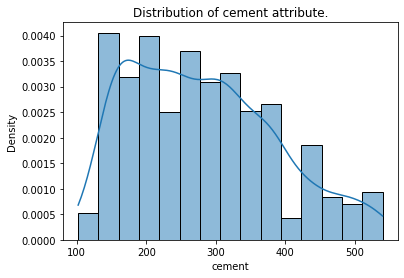

In [4]:
# cement attribute
numerical_attribute_info(dataset=dataframe, column='cement')

Description about 'slag' attribute

Data Type: float64
Missing values: 0

Minimum: 0.0
Maximum: 359.4
Range: 359.4

Mean: 73.89582524271844
Median(2nd Quartile): 22.0

Standard Deviation: 86.27934174810582
1st Quartile: 0.0
3rd Quartile: 142.95
Interquartile Range: 142.95

Skewness: 0.8007168956061774
Kurtosis: -0.5081754788835435

Since skewness is positive. So, distribution is right tailed or positive skewed.
Since excess kurtosis is negative.So, distribution is Platykurtic (flat tails) and it indicates distribution may contain small outliers.


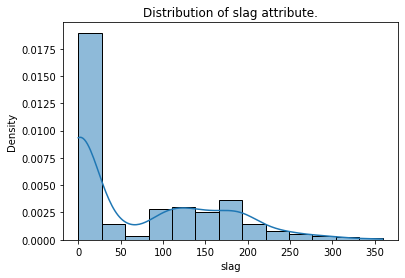

In [5]:
# slag attribute
numerical_attribute_info(dataset=dataframe, column='slag')

Description about 'ash' attribute

Data Type: float64
Missing values: 0

Minimum: 0.0
Maximum: 200.1
Range: 200.1

Mean: 54.18834951456311
Median(2nd Quartile): 0.0

Standard Deviation: 63.99700415268765
1st Quartile: 0.0
3rd Quartile: 118.3
Interquartile Range: 118.3

Skewness: 0.5373539058066844
Kurtosis: -1.3287464346799722

Since skewness is positive. So, distribution is right tailed or positive skewed.
Since excess kurtosis is negative.So, distribution is Platykurtic (flat tails) and it indicates distribution may contain small outliers.


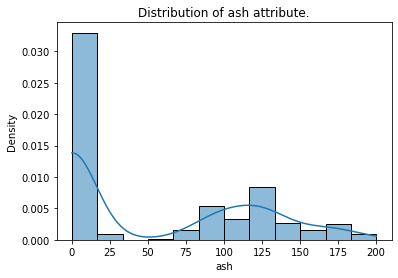

In [6]:
# ash attribute
numerical_attribute_info(dataset=dataframe, column='ash')

Description about 'water' attribute

Data Type: float64
Missing values: 0

Minimum: 121.8
Maximum: 247.0
Range: 125.2

Mean: 181.56728155339806
Median(2nd Quartile): 185.0

Standard Deviation: 21.35421856503247
1st Quartile: 164.9
3rd Quartile: 192.0
Interquartile Range: 27.099999999999994

Skewness: 0.07462838428549402
Kurtosis: 0.1220816743945825

Since skewness is positive. So, distribution is right tailed or positive skewed.
Since excess kurtosis is negative.So, distribution is Platykurtic (flat tails) and it indicates distribution may contain small outliers.


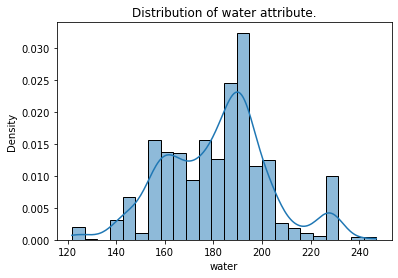

In [7]:
# water attribute
numerical_attribute_info(dataset=dataframe, column='water')

Description about 'superplastic' attribute

Data Type: float64
Missing values: 0

Minimum: 0.0
Maximum: 32.2
Range: 32.2

Mean: 6.204660194174758
Median(2nd Quartile): 6.4

Standard Deviation: 5.97384139248552
1st Quartile: 0.0
3rd Quartile: 10.2
Interquartile Range: 10.2

Skewness: 0.9072025748672466
Kurtosis: 1.4112689653489738

Since skewness is positive. So, distribution is right tailed or positive skewed.
Since excess kurtosis is negative.So, distribution is Platykurtic (flat tails) and it indicates distribution may contain small outliers.


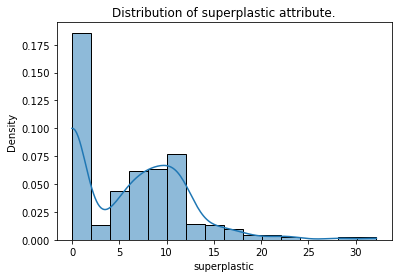

In [8]:
# superplastic attribute
numerical_attribute_info(dataset=dataframe, column='superplastic')

Description about 'coarseagg' attribute

Data Type: float64
Missing values: 0

Minimum: 801.0
Maximum: 1145.0
Range: 344.0

Mean: 972.9189320388349
Median(2nd Quartile): 968.0

Standard Deviation: 77.75395396672077
1st Quartile: 932.0
3rd Quartile: 1029.4
Interquartile Range: 97.40000000000009

Skewness: -0.04021974481106704
Kurtosis: -0.5990161032185641

Since skewness is negative. So, distribution is left tailed or negative skewed.
Since excess kurtosis is negative.So, distribution is Platykurtic (flat tails) and it indicates distribution may contain small outliers.


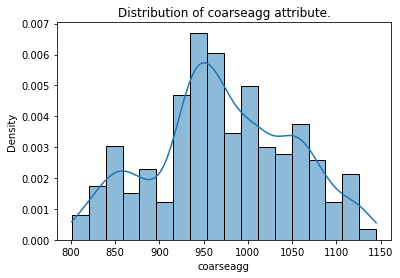

In [9]:
# coarseagg attribute
numerical_attribute_info(dataset=dataframe, column='coarseagg')

Description about 'fineagg' attribute

Data Type: float64
Missing values: 0

Minimum: 594.0
Maximum: 992.6
Range: 398.6

Mean: 773.5804854368931
Median(2nd Quartile): 779.5

Standard Deviation: 80.17598014240437
1st Quartile: 730.9499999999999
3rd Quartile: 824.0
Interquartile Range: 93.05000000000007

Skewness: -0.25300959769707143
Kurtosis: -0.10217698932117969

Since skewness is negative. So, distribution is left tailed or negative skewed.
Since excess kurtosis is negative.So, distribution is Platykurtic (flat tails) and it indicates distribution may contain small outliers.


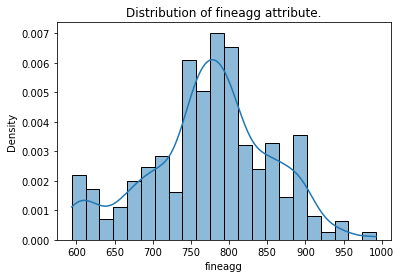

In [10]:
# fineagg attribute
numerical_attribute_info(dataset=dataframe, column='fineagg')

Description about 'age' attribute

Data Type: int64
Missing values: 0

Minimum: 1
Maximum: 365
Range: 364

Mean: 45.662135922330094
Median(2nd Quartile): 28.0

Standard Deviation: 63.16991158103249
1st Quartile: 7.0
3rd Quartile: 56.0
Interquartile Range: 49.0

Skewness: 3.2691774006345895
Kurtosis: 12.168988978672088

Since skewness is positive. So, distribution is right tailed or positive skewed.
Since excess kurtosis is positive.So, distribution is Leptokurtic (heavy tails) and it indicates distribution contain large outliers.


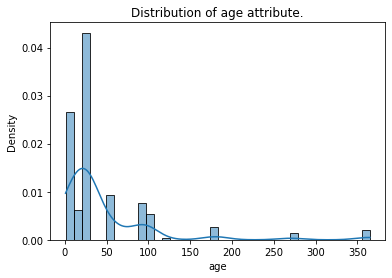

In [11]:
# age attribute
numerical_attribute_info(dataset=dataframe, column='age')

<b>b. Multivariate analysis</b>

In [12]:
def plot_scatter(data, y = 'strength'):
    # get column names of dataframe
    cols = list(data.columns)[:-1]
    # setting up shape of subplots
    fig, ax = plt.subplots(nrows=(len(cols)//2), ncols=2, sharey=True, figsize=(15, 15))
    fig.suptitle("Scatter Plot between Independent attributes and {}".format(y))
    # plotting
    for i, c in enumerate(cols):
        ax[(i//2),i%2].scatter(x = data[c], y = data[y], c = 'blue', marker=".")
        ax[(i//2),i%2].set_xlabel(c)
        if i%2 == 0:
            ax[(i//2),i%2].set_ylabel(y)
        #ax[(i//2),i%2].grid()
    fig.tight_layout()
    plt.show()

##### strength vs remaining independent variable

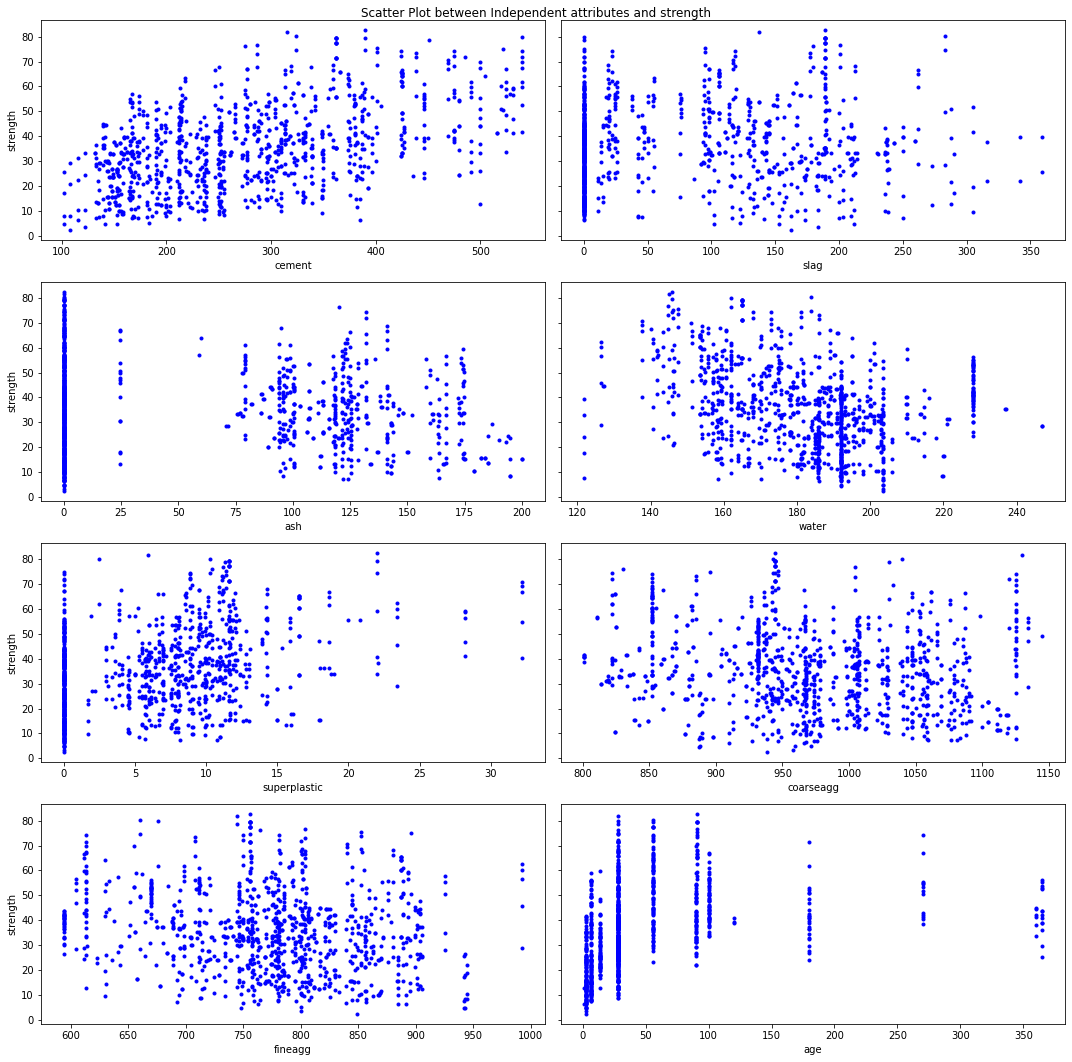

In [13]:
plot_scatter(data=dataframe, y="strength")

##### Note:
<ol>
    <li> According to scatter plot between cement and strength, we can clearly see that there is positive linear trend exist between quantity of cement and compressive strength of concrete.</li>
    <li> According to scatter plot between water and strength, we can conclude that there is increase water leads to increase in compressive strength initially but at the certain level, after that if we increase more water than critical level, then the compressive strength of concrete will decrease.</li>
    <li> Strength vs superplastic, there is some positive trend between quantity of superplastic and strength of concrete.</li>
    <li> According to age and strength scatter plot, compressive strength of concrete is increasing as increase in age till 100-120 days but after that it also showing that concrete compressive strength is decreassing.</li>
    <li> Scatter plot of slag, ash and superplastic, there is lot of zero datapoints are present. It indicates that Fly ash Cement, Blast furnace slag and Superplasticizer were not mixed in every mixer of concrete.</li>
    <li> Quantity of Coarse Aggregate and Fine Aggregate are not directly affecting the strength of concrete.</li>
</ol>

##### Correlation Plot between attributes

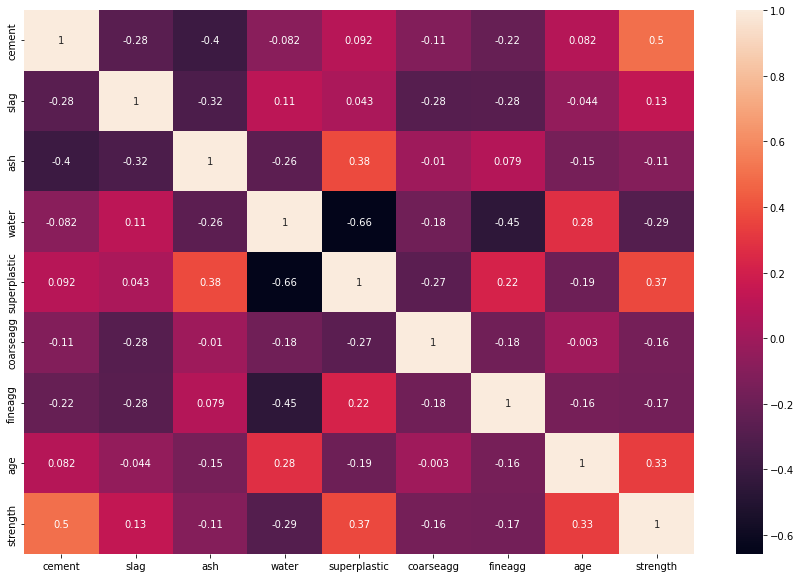

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(), annot=True)
plt.show()

##### Note (from above correlation heatmap):
<ol>
    <li>We can clearly see that maximum positive correlarion of strength exist with cement means increase in cement quantity into mixer will increase the compressive strength of cement.</li>
    <li>Also, Increase in Age of concrete and Superplastic ingredient leads to higher strength of concrete.</li>
    <li>Flying ash Cement is not contributing in higher strength of concrete.</li>
</ol>

In [15]:
def plot_box(data):
    # get column names of dataframe
    cols = list(data.columns)[:-1]
    # setting up shape of subplots
    fig, ax = plt.subplots(nrows=(len(cols)//2), ncols=2, sharey=True, figsize=(12, 10))
    fig.suptitle("Box Plot of attributes")
    # plotting
    for i, c in enumerate(cols):
        sns.boxplot(x = c, data=data, color='cyan', ax=ax[(i//2),i%2])
    fig.tight_layout()
    plt.show()

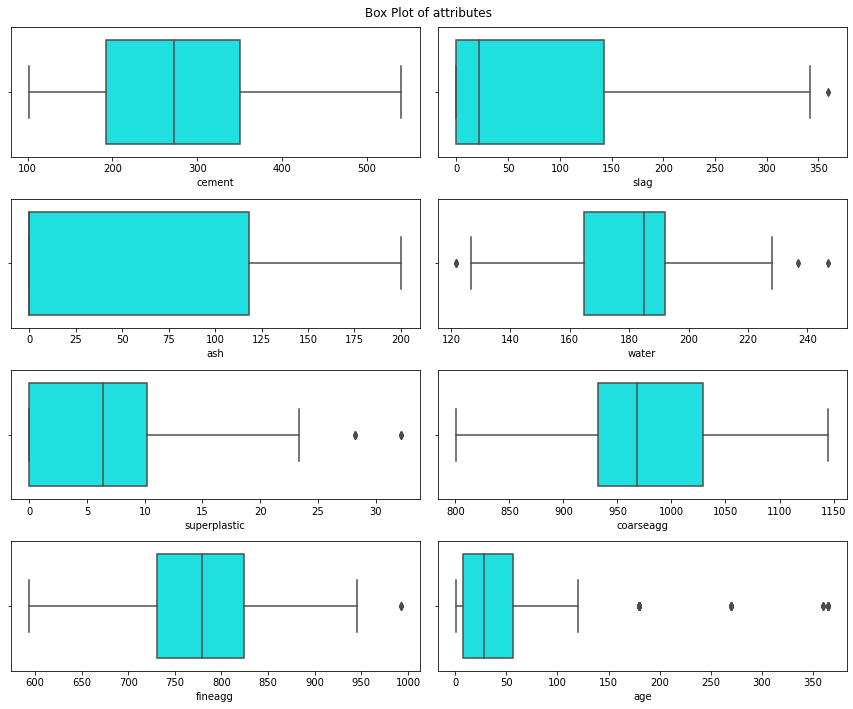

In [16]:
plot_box(dataframe)

##### Note (from above box plot attributes):
<ol>
    <li>We can clearly see that cement, ash and coarseagg variables are not containing any outliers. In ash variable, more than 50% time, quantity of Flying ash Cement is zero.</li>
    <li>slag, water, superplastic and fineagg are containig 2 or 3 outliers.But in slag variable, that one outlier is very far away to the median and because of that outlier mean (74) of slag is very far from median (22).</li>
    <li>age variable containing many outliers which is very far away from median of age but that ages is below 365 days. Here, we can say that most of the concrete age is below 100 days and very few data belongs to old concrete information (like more than 100 days.)</li>
</ol>

<b>c. Pick one strategy to address the presence outliers and missing values and perform
necessary imputation</b>
- There is no missing values in the dataset.
- In order to detect outliers, we will apply IQR-score analysis on each feature.

##### Outliers:

In [17]:
q1 = dataframe.quantile(q=0.25)
q3 = dataframe.quantile(q=0.75)
IQR = q3 - q1
print("Interquartile range for each attribute: ")
print(IQR)

Interquartile range for each attribute: 
cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


In [18]:
outliers = dataframe[((dataframe < (q1 - 1.5 * IQR)) |(dataframe > (q3 + 1.5 * IQR))).any(axis=1)]
print("Number of rows containing outliers: {}".format(outliers.shape[0]))

Number of rows containing outliers: 89


In [19]:
dataframe_with_no_outliers = dataframe[~((dataframe < (q1 - 1.5 * IQR)) |(dataframe > (q3 + 1.5 * IQR))).any(axis=1)]
dataframe_with_no_outliers.reset_index(0, drop=True, inplace=True)
print("Dataframe (Free from outliers) size: ", dataframe_with_no_outliers.shape)

Dataframe (Free from outliers) size:  (941, 9)


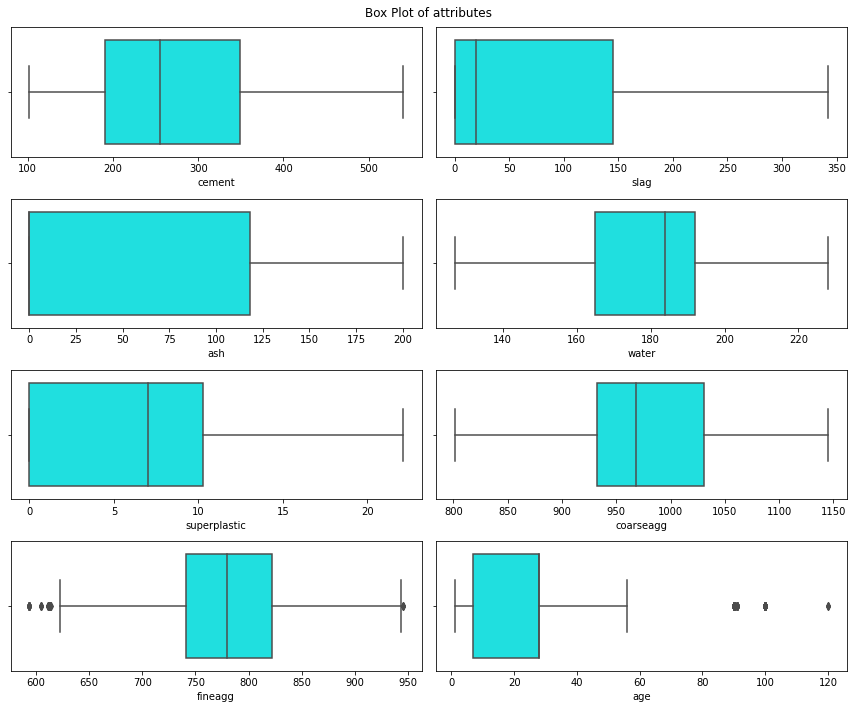

In [20]:
plot_box(dataframe_with_no_outliers)

##### Note (from above box plot attributes):
<ol>
    <li> Now, We can clearly see that outliers of all attributes are wipe out except fineagg and age variable.</li>
    <li> But fineagg and age variable outliers are not very far away from median.</li>
</ol>

#### 2. Deliverable - 2 (Feature Engineering techniques)
a. Identify opportunities (if any) to create a composite feature, drop a feature etc

we can try linear transformation/combination of attributes or ratio of attributes.

<b>Ratio of slag and ash (slag/ash)</b>

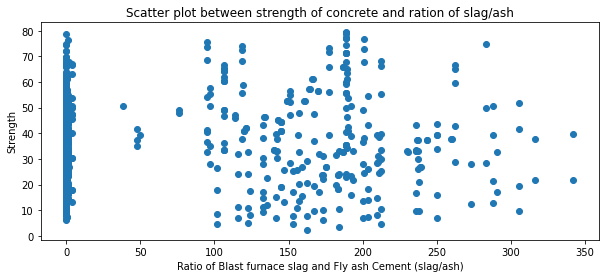

In [21]:
ratio_slag_ash = dataframe_with_no_outliers.apply(lambda x: x["slag"]/(1+x["ash"]), axis=1)

plt.figure(figsize=(10, 4))
plt.scatter(x=ratio_slag_ash, y=dataframe_with_no_outliers.strength)
plt.xlabel("Ratio of Blast furnace slag and Fly ash Cement (slag/ash)")
plt.ylabel("Strength")
plt.title("Scatter plot between strength of concrete and ration of slag/ash")
plt.show()

<b>Note:</b> Ratio of slag and ash is not affecting the compressive strength of concrete.

<b>Ratio of Coarse Aggregate and Fine Aggregate (coarseagg/fineagg)</b>

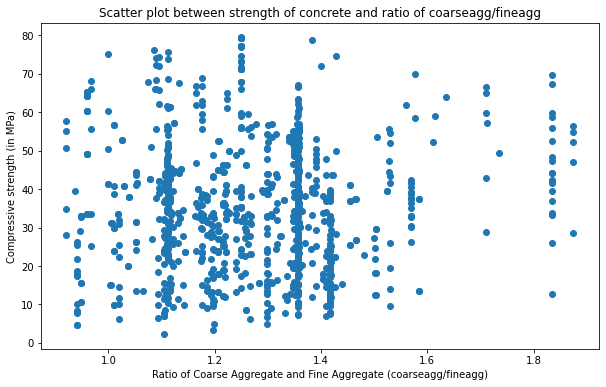

In [22]:
# ratio = coarse / fine
ratio_coarse_fine = dataframe_with_no_outliers.apply(lambda x: x["coarseagg"]/(x["fineagg"]), axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(x=ratio_coarse_fine, y=dataframe_with_no_outliers.strength)
plt.xlabel("Ratio of Coarse Aggregate and Fine Aggregate (coarseagg/fineagg)")
plt.ylabel("Compressive strength (in MPa)")
plt.title("Scatter plot between strength of concrete and ratio of coarseagg/fineagg")
plt.show()

<b>Note:</b> Ratio of coarse aggregate and fine aggregate is somewhat positively affecting the compressive strength of concrete. Means when this ratio is increasing then there is increase in stength also.

In [23]:
dataframe_new_features = pd.concat([dataframe_with_no_outliers, 
                                    pd.Series(ratio_coarse_fine, name="coarse_fine_ratio"),], 
                                   axis=1)

# remove coarse and ash individual feature
# dataframe_new_features.drop(columns=["coarseagg", "fineagg"], inplace=True)
dataframe_new_features.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,coarse_fine_ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.298330
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1.357448
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1.111124
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1.391045
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.503373


<b>b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help</b>

We will test linearity by applying OLS method on each attribute individually and see it's distribution of error against predicted values.

In [24]:
model = ols(formula="strength ~ cement + age + water + slag + ash + superplastic + coarseagg + fineagg + coarse_fine_ratio", 
            data=dataframe_new_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     352.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          6.76e-293
Time:                        23:23:14   Log-Likelihood:                -3279.6
No. Observations:                 941   AIC:                             6579.
Df Residuals:                     931   BIC:                             6628.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            98.0640     25.831      3.796      0.000      47.371     148.757
cement                0.1046      0.007     15.056      0.000       0.091       0.118
age                   0.3135      0.009     34.373      0.000       0.296       0.331
water                -0.2413      0.035     -6.958      0.000      -0.309      -0.173
slag                  0.0771      0.008      9.218      0.000       0.061       0.093
ash                   0.0468      0.010      4.554      0.000       0.027       0.067
superplastic          0.2387      0.085      2.814      0.005       0.072       0.405
coarseagg             0.0445      0.017      2.656      0.008       0.012       0.077
fineagg              -0.0774      0.020     -3.817      0.000      -0.117      -0.038
coarse_fine_ratio   -40.7293     11.057     -3.684      0.000     -62.428     -19.030
==============================================================================
Omnibus:                        7.235   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.054
Skew:                           0.137   Prob(JB):                       0.0178
Kurtosis:                       3.361   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

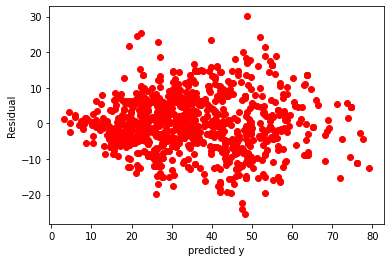

In [25]:
plt.scatter(x=model.predict(), y=model.resid, c='red')
plt.xlabel("predicted y")
plt.ylabel("Residual")
plt.show()

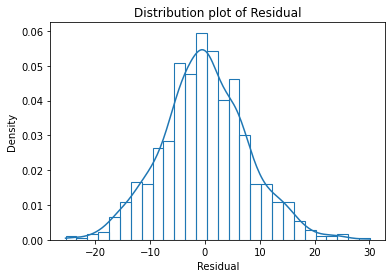

In [26]:
#plt.hist(model.resid, density=True, bins=30)
sns.histplot(model.resid, stat="density", fill=False, kde=True)
plt.xlabel("Residual")
plt.title("Distribution plot of Residual")
plt.show()

##### Note (from OLS method):
<ol>
    <li>According to statistical test, overall model is significant model.</li>
    <li>All independent attributes are playing significant role in predicting compressive strength of concrete (including coarse and fine ratio)</li>
    <li>cement is very important feature in order to maximize the compressive strength of concrete. There are unit increase in cement will increase the strength of concrete by 0.1046 time.</li>
    <li> Top Three attributes are playing significant role with less standard error: cement, age of concrete and Blast furnace slag.</li>
</ol>

#### Deliverable -3 (create the model )

In [27]:
# Importing some necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# separating input and output features
X = dataframe_new_features.drop(['strength'], axis='columns')
y = dataframe_new_features['strength']

Now, we need to Normalize the scale of each attributes using Min-Max Scaling Technique.

In [32]:
scaler = MinMaxScaler().fit(X)
normalized_data = scaler.transform(X)
normalized_X = pd.DataFrame(data=normalized_data, columns=X.columns)
normalized_X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,coarse_fine_ratio
0,0.089726,0.619702,0.000000,0.757426,0.000000,0.496512,0.440171,0.226891,0.395897
1,0.152740,0.123356,0.621189,0.309901,0.488688,0.813372,0.576068,0.109244,0.457840
2,0.337900,0.000000,0.478261,0.598020,0.248869,0.453198,0.761254,0.226891,0.199743
3,0.374429,0.333236,0.000000,1.000000,0.000000,0.380814,0.216524,0.226891,0.493043
4,0.120548,0.536101,0.000000,0.656436,0.411765,0.716279,0.292593,0.226891,0.610740


In [33]:
# Split Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(normalized_X,y,test_size = 0.2, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(752, 9) (189, 9) (752,) (189,)


<b>Baseline Model</b><br>
we are making a base model by using test data mean value. This is set a benchmark and to compare it with our regression model.

In [34]:
# finding the mean for test data value
base_pred = np.mean(y_test)

# repeating same value till the test length
base_pred = np.repeat(base_pred,len(y_test))

# finding RMSE
base_root_mean_squared_error = np.sqrt(mean_squared_error(y_test,base_pred))
print("Root Mean Squared Error for Base Model is: ",base_root_mean_squared_error)

Root Mean Squared Error for Base Model is:  17.615577142991395


<b>Linear Regression</b>

In [35]:
# setting intercept as true
lgr = LinearRegression(fit_intercept = True)

# fit the model
model_lgr = lgr.fit(X_train,y_train)

# predicting model on test data
predicted_y = model_lgr.predict(X_test)

# R Squared Value
r2_lin_train = model_lgr.score(X_train,y_train)
r2_lin_test = model_lgr.score(X_test,y_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicted_y)))
print('R2 for Train Data',r2_lin_train)
print('R2 for Test Data', r2_lin_test)

RMSE: 8.18566385142715
R2 for Train Data 0.7697020585081682
R2 for Test Data 0.784069465879379


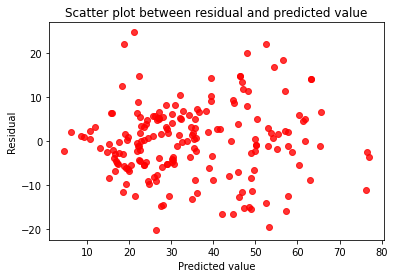

In [36]:
# Residuals plot
residuals  = y_test - predicted_y
sns.regplot(x = predicted_y, y = residuals, scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Scatter plot between residual and predicted value')
plt.show()

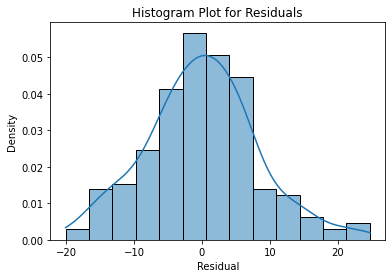

In [37]:
sns.histplot(residuals, stat='density', kde=True)
plt.xlabel('Residual')
plt.title('Histogram Plot for Residuals')
plt.show()

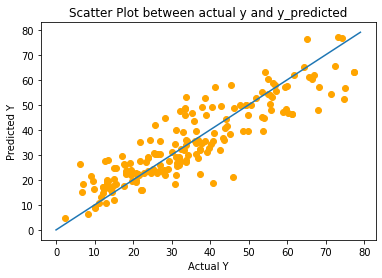

In [38]:
plt.scatter(y_test,predicted_y,c='orange')
# 45-degree line
plt.plot(list(range(0,80)), list(range(0,80)))
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot between actual y and y_predicted')
plt.show()

<b>Random Forest for Regression</b>
<ol>
    <li>Here, we don't need to Normalize the attribute</li>
    <li>Random Forest is not sensitive to outliers because it is using Decision tree internally.</li>
    <li>Random Forest can capture Non-linear relationship between strength and predictors</li>
    <li>Also, we will tune the paramters using RandomizedSearchCV for getting better hyperparameter.</li>
</ol>

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

In [40]:
# separating input and output features
X = dataframe.drop(['strength'], axis='columns')
y = dataframe['strength']

# Split Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(824, 8) (206, 8) (824,) (206,)


Tuning the model

In [41]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop=300, num=3)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 15, num=3)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [3, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [42]:
# Random search of parameters, using 5 fold cross validation, 
# search across 20 different combinations of hyperparameters
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions=random_grid,
                               n_iter=20, cv=5, 
                               verbose=1, random_state=3)

# train the model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 7],
                                        'min_samples_split': [3, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=3, verbose=1)

In [43]:
print("Best Parameters: ", rf_random.best_params_)

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}


In [44]:
train_y_pred = rf_random.predict(X_train)
y_pred = rf_random.predict(X_test)

print('R2 Score for Train Data:', round(r2_score(y_train, train_y_pred), 4))
print('R2 Score for Test Data:', round(r2_score(y_test, y_pred), 4))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))

R2 Score for Train Data: 0.9675
R2 Score for Test Data: 0.8856
RMSE: 5.7023


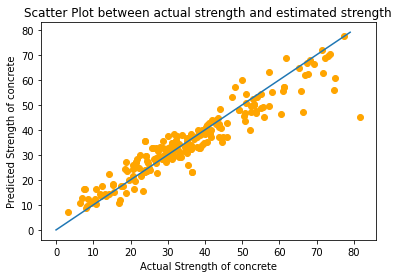

In [45]:
plt.scatter(y_test, y_pred,c='orange')
# 45-degree line
plt.plot(list(range(0,80)), list(range(0,80)))
plt.xlabel('Actual Strength of concrete')
plt.ylabel('Predicted Strength of concrete')
plt.title('Scatter Plot between actual strength and estimated strength')
plt.show()

<b>Model performance range at 95% confidence level</b>

In [49]:
M = 10000
rmse = []
r2 = []

for _ in range(M):
    # Split Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=True)
    # predictions on test set
    y_pred = rf_random.predict(X_test)
    # append mse
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    # append r2
    r2.append(r2_score(y_test, y_pred))
    

# medians
median_rmse = round(np.median(rmse), 4)
median_r2 = round(np.median(r2), 4)

# 95% confidence interval on rmse
lower_bound_rmse = round(np.percentile(rmse, 2.5), 4)
upper_bound_rmse = round(np.percentile(rmse, 97.5), 4)

# 95% confidence interval on r2
lower_bound_r2 = round(np.percentile(r2, 2.5), 4)
upper_bound_r2 = round(np.percentile(r2, 97.5), 4)

print("Final Model Performance:\n")
print("Median RMSE: {}".format(median_rmse))
print("RMSE range at 95% confidence level: [{} - {}]\n".format(lower_bound_rmse, upper_bound_rmse))
print("Median R-Squared(R2): {}".format(median_r2))
print("R-Squared range at 95% confidence level: [{} - {}]".format(lower_bound_r2, upper_bound_r2))

Final Model Performance:

Median RMSE: 3.593
RMSE range at 95% confidence level: [3.0061 - 4.6115]

Median R-Squared(R2): 0.953
R-Squared range at 95% confidence level: [0.9241 - 0.9675]
